In [1]:
!pip install matplotlib
!pip install networkx
!pip install pandas

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
with open('./dati-json/dpc-covid19-ita-province.json') as f:
    covid19_provinces_data = json.load(f)

with open('./dati-json/dpc-covid19-ita-regioni.json') as f:
    covid19_regions_data = json.load(f)

In [4]:
data = []
for province in covid19_provinces_data:
    province_denomination = province['sigla_provincia']
    province_date = province['data']
    # Es. ('FI', '2020-02-24T...', all data on that row)
    # the first 2 values will be used as key
    data.append([province_denomination, province_date, province.values()]) 

# Sort according to the date
data = sorted(data, key=lambda x: x[0])
# Prepare data for the DataFrame
index = []
province_info = []
for province in data:
    index.append([province[0], province[1]]) # (Name, date)
    province_info.append(province[2]) # (codice_regione, codice_provincia, ...)
index = pd.MultiIndex.from_tuples(index) # Index ranking: 1° City's name, 2° date
# Create finally the DataFrame
dati = pd.DataFrame(province_info, index=index, columns=covid19_provinces_data[0].keys())
# and drop some usless columns
dati = dati.drop(columns=['denominazione_provincia', 'stato', 'codice_provincia', 'note_it', 'note_en', 'codice_regione'])
dati

data  denominazione_regione  \
   2020-02-24T18:00:00  2020-02-24T18:00:00                Abruzzo   
   2020-02-24T18:00:00  2020-02-24T18:00:00             Basilicata   
   2020-02-24T18:00:00  2020-02-24T18:00:00           P.A. Bolzano   
   2020-02-24T18:00:00  2020-02-24T18:00:00               Calabria   
   2020-02-24T18:00:00  2020-02-24T18:00:00               Campania   
   2020-02-24T18:00:00  2020-02-24T18:00:00         Emilia-Romagna   
   2020-02-24T18:00:00  2020-02-24T18:00:00  Friuli Venezia Giulia   
   2020-02-24T18:00:00  2020-02-24T18:00:00                  Lazio   
   2020-02-24T18:00:00  2020-02-24T18:00:00                Liguria   
   2020-02-24T18:00:00  2020-02-24T18:00:00              Lombardia   
   2020-02-24T18:00:00  2020-02-24T18:00:00                 Marche   
   2020-02-24T18:00:00  2020-02-24T18:00:00                 Molise   
   2020-02-24T18:00:00  2020-02-24T18:00:00               Piemonte   
   2020-02-24T18:00:00  2020-02-24T18:00:00                 Puglia   
   2020-02-24T18:00:00  2020-02-24T18:00:00               Sardegna   
   2020-02-24T18:00:00  2020-02-24T18:00:00                Sicilia   
   2020-02-24T18:00:00  2020-02-24T18:00:00                Toscana   
   2020-02-24T18:00:00  2020-02-24T18:00:00            P.A. Trento   
   2020-02-24T18:00:00  2020-02-24T18:00:00                 Umbria   
   2020-02-24T18:00:00  2020-02-24T18:00:00          Valle d'Aosta   
   2020-02-24T18:00:00  2020-02-24T18:00:00                 Veneto   
   2020-02-25T18:00:00  2020-02-25T18:00:00                Abruzzo   
   2020-02-25T18:00:00  2020-02-25T18:00:00             Basilicata   
   2020-02-25T18:00:00  2020-02-25T18:00:00           P.A. Bolzano   
   2020-02-25T18:00:00  2020-02-25T18:00:00               Calabria   
   2020-02-25T18:00:00  2020-02-25T18:00:00               Campania   
   2020-02-25T18:00:00  2020-02-25T18:00:00         Emilia-Romagna   
   2020-02-25T18:00:00  2020-02-25T18:00:00  Friuli Venezia Giulia   
   2020-02-25T18:00:00  2020-02-25T18:00:00                  Lazio   
   2020-02-25T18:00:00  2020-02-25T18:00:00                Liguria   
...                                     ...                    ...   
VV 2020-04-20T17:00:00  2020-04-20T17:00:00               Calabria   
   2020-04-21T17:00:00  2020-04-21T17:00:00               Calabria   
   2020-04-22T17:00:00  2020-04-22T17:00:00               Calabria   
   2020-04-23T17:00:00  2020-04-23T17:00:00               Calabria   
   2020-04-24T17:00:00  2020-04-24T17:00:00               Calabria   
   2020-04-25T17:00:00  2020-04-25T17:00:00               Calabria   
   2020-04-26T17:00:00  2020-04-26T17:00:00               Calabria   
   2020-04-27T17:00:00  2020-04-27T17:00:00               Calabria   
   2020-04-28T17:00:00  2020-04-28T17:00:00               Calabria   
   2020-04-29T17:00:00  2020-04-29T17:00:00               Calabria   
   2020-04-30T17:00:00  2020-04-30T17:00:00               Calabria   
   2020-05-01T17:00:00  2020-05-01T17:00:00               Calabria   
   2020-05-02T17:00:00  2020-05-02T17:00:00               Calabria   
   2020-05-03T17:00:00  2020-05-03T17:00:00               Calabria   
   2020-05-04T17:00:00  2020-05-04T17:00:00               Calabria   
   2020-05-05T17:00:00  2020-05-05T17:00:00               Calabria   
   2020-05-06T17:00:00  2020-05-06T17:00:00               Calabria   
   2020-05-07T17:00:00  2020-05-07T17:00:00               Calabria   
   2020-05-08T17:00:00  2020-05-08T17:00:00               Calabria   
   2020-05-09T17:00:00  2020-05-09T17:00:00               Calabria   
   2020-05-10T17:00:00  2020-05-10T17:00:00               Calabria   
   2020-05-11T17:00:00  2020-05-11T17:00:00               Calabria   
   2020-05-12T17:00:00  2020-05-12T17:00:00               Calabria   
   2020-05-13T17:00:00  2020-05-13T17:00:00               Calabria   
   2020-05-14T17:00:00  2020-05-14T17:00:00               Calabria   
   2020-05-15T17:00:00  2020-05-15T17:00:00      

Text(0.5, 1.0, 'Top 20 provinces with most cases')

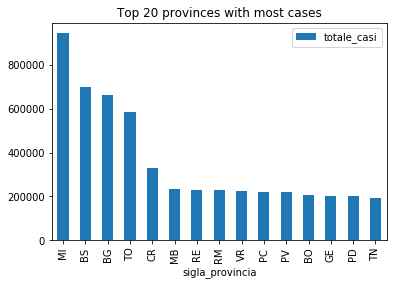

In [5]:
# group by "sigla_provincia" and sum all the values. Then drop 'lat' and 'long' columns and show 
# the top 15 provinces with the highest value on 'totale_casi'
dati.groupby(['sigla_provincia']).sum().drop(columns=['lat', 'long']).nlargest(15, 'totale_casi').plot(kind="bar")
plt.title("Top 20 provinces with most cases") # I don't know why this 'plt.title()' is working 
#but the others right below don't

In [6]:
# Get the provinces name (Sigle)
provinces = dati.sigla_provincia.unique()
# Create a DataFrame with total cases per month for each province
cases_per_month = {}

for province in provinces: 
    province_info = dati.loc[province]
    # The 'groupby(province_info.data.str[:7]' is used to group the rows according to the month
    # The [:7] is used to slice the first t letters of the 'data' column
    # 2020-05-15T17:00:00 ---> 2020-05
    # And finally sum the 'totale_casi' values grouped by month for each province
    cases_per_month[province] = pd.Series(province_info.groupby(province_info.data.str[:7])['totale_casi'].sum())

# Create the DataFrame using the Series defined in the for loop
cpm = pd.DataFrame(cases_per_month)
cpm.index.name = "" # Works fine even without this line, but there was an empty line that was bothering me
cpm = cpm.T # For a better view
cpm

,2020-02,2020-03,2020-04,2020-05
,198,39032,86204,60379
AG,0,878,3697,2615
AL,0,14258,74646,70245
AN,0,12655,47962,34855
AO,0,6155,28725,21967
AP,0,1465,7714,5445
AQ,0,961,6467,4634
AR,0,3291,14922,12551
AT,0,4462,29074,31891
AV,0,2381,12028,9372


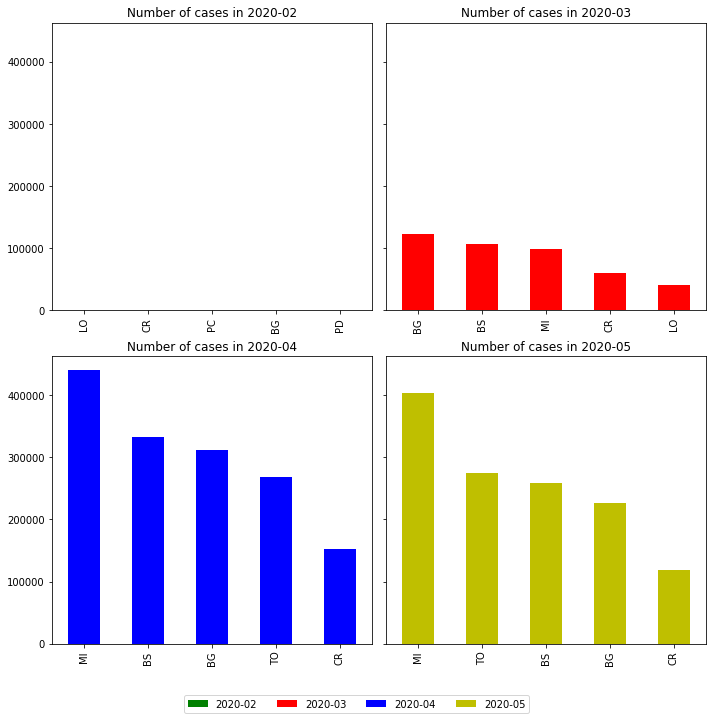

In [25]:
grid_size = (2,2) # For the 4 month considered
colors = ['g', 'r', 'b', 'y']
fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], sharey=True, figsize=(10,10))
cities_with_worst_cases = [] # Store the name of the cities with the worst cases

month = 0
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        # Cities twith the worst cases in the current month
        worst_cases = cpm.nlargest(5, cpm.columns[month])[cpm.columns[month]]
        worst_cases.plot(ax=axes[i,j], kind='bar', legend=False, color=colors[month])
        axes[i, j].set_title('Number of cases in '+cpm.columns[month]) # Doesn't work
        cities_with_worst_cases.append(worst_cases)
        month += 1
        
fig.tight_layout()
fig.subplots_adjust(bottom=0.1)
fig.legend(labels=cpm.columns, loc="lower center", ncol=4)

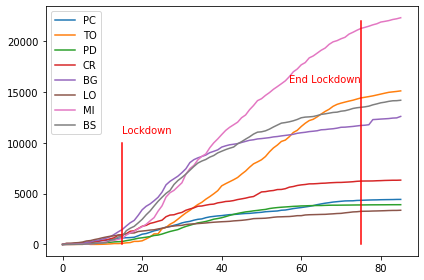

In [8]:
# Create a set of the cities with the worst case 
interested_city = list(set([item for sublist in [list(city.index) for city in cities_with_worst_cases] for item in sublist]))


# Collect information about these cities day by day
for i in range(len(interested_city)):
    case_per_day = dati.loc[interested_city[i]]['totale_casi']
    plt.plot(list(range(len(case_per_day))), case_per_day, label=interested_city[i])

plt.ylabel ="number of cases"
plt.plot((15, 15), (0, 10000), 'r-')
plt.text(15, 11000, "Lockdown", color="r")
plt.plot((75, 75), (0, 22000), 'r-')
plt.text(57, 16000, "End Lockdown", color="r")
plt.tight_layout()
plt.legend()


In [9]:
covid19_provinces_data

[{'codice_provincia': 69,
  'codice_regione': 13,
  'data': '2020-02-24T18:00:00',
  'denominazione_provincia': 'Chieti',
  'denominazione_regione': 'Abruzzo',
  'lat': 42.35103167,
  'long': 14.16754574,
  'note_en': '',
  'note_it': '',
  'sigla_provincia': 'CH',
  'stato': 'ITA',
  'totale_casi': 0},
 {'codice_provincia': 66,
  'codice_regione': 13,
  'data': '2020-02-24T18:00:00',
  'denominazione_provincia': "L'Aquila",
  'denominazione_regione': 'Abruzzo',
  'lat': 42.35122196,
  'long': 13.39843823,
  'note_en': '',
  'note_it': '',
  'sigla_provincia': 'AQ',
  'stato': 'ITA',
  'totale_casi': 0},
 {'codice_provincia': 68,
  'codice_regione': 13,
  'data': '2020-02-24T18:00:00',
  'denominazione_provincia': 'Pescara',
  'denominazione_regione': 'Abruzzo',
  'lat': 42.46458398,
  'long': 14.21364822,
  'note_en': '',
  'note_it': '',
  'sigla_provincia': 'PE',
  'stato': 'ITA',
  'totale_casi': 0},
 {'codice_provincia': 67,
  'codice_regione': 13,
  'data': '2020-02-24T18:00:00',

In [10]:
# For tomorrow maybe

dataframe_data = {}
for region in covid19_regions_data:
    region_denomination = region['denominazione_regione']
    regions_data = pd.Series(region)
    dataframe_data[region_denomination] = regions_data
regions_data_frame = pd.DataFrame(dataframe_data).T
regions_data_frame.drop(columns=['data', 'denominazione_regione', 'stato', 'note_it', 'note_en'])

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
Abruzzo,13,42.3512,13.3984,188,6,194,1195,1389,-24,4,1419,389,3197,58945,41162
Basilicata,17,40.6395,15.8051,26,1,27,57,84,-9,1,282,27,393,23347,22767
P.A. Bolzano,21,46.4993,11.3566,46,6,52,256,308,1,5,1988,291,2587,55526,25263
Calabria,18,38.906,16.5944,50,2,52,330,382,-19,2,676,95,1153,57310,55270
Campania,15,40.8396,14.2508,330,17,347,1171,1518,-155,12,2790,399,4707,147225,69264
Emilia-Romagna,8,44.4944,11.3417,670,99,769,4561,5330,-195,47,17987,3997,27314,268200,168367
Friuli Venezia Giulia,6,45.6494,13.7681,76,2,78,522,600,-21,5,2283,320,3203,105656,65476
Lazio,12,41.8928,12.4837,1124,74,1198,2588,3786,-40,20,3079,640,7505,213877,171353
Liguria,7,44.4115,8.9327,338,22,360,1904,2264,-75,66,5617,1376,9257,83593,49038
Lombardia,3,45.4668,9.19035,4426,244,4670,22621,27291,218,462,42593,15597,85481,596355,353579


In [11]:
covid19_regions_data

[{'casi_testati': None,
  'codice_regione': 13,
  'data': '2020-02-24T18:00:00',
  'deceduti': 0,
  'denominazione_regione': 'Abruzzo',
  'dimessi_guariti': 0,
  'isolamento_domiciliare': 0,
  'lat': 42.35122196,
  'long': 13.39843823,
  'note_en': '',
  'note_it': '',
  'nuovi_positivi': 0,
  'ricoverati_con_sintomi': 0,
  'stato': 'ITA',
  'tamponi': 5,
  'terapia_intensiva': 0,
  'totale_casi': 0,
  'totale_ospedalizzati': 0,
  'totale_positivi': 0,
  'variazione_totale_positivi': 0},
 {'casi_testati': None,
  'codice_regione': 17,
  'data': '2020-02-24T18:00:00',
  'deceduti': 0,
  'denominazione_regione': 'Basilicata',
  'dimessi_guariti': 0,
  'isolamento_domiciliare': 0,
  'lat': 40.63947052,
  'long': 15.80514834,
  'note_en': '',
  'note_it': '',
  'nuovi_positivi': 0,
  'ricoverati_con_sintomi': 0,
  'stato': 'ITA',
  'tamponi': 0,
  'terapia_intensiva': 0,
  'totale_casi': 0,
  'totale_ospedalizzati': 0,
  'totale_positivi': 0,
  'variazione_totale_positivi': 0},
 {'casi_tes

In [12]:
# CLAU da qui in giù
# showing clean province data
province_data = pd.DataFrame(covid19_provinces_data)
#province.set_index('data', 'denominazione_provincia')
# not showing the "denominazione_provincia"s in updating phase and not useful columns
refined_province_data = province_data[province_data.denominazione_provincia!= "In fase di definizione/aggiornamento"].drop(columns=["long", "lat", "note_it", "note_en", "codice_provincia", "codice_regione", "stato"])
refined_province_data.head()


,data,denominazione_provincia,denominazione_regione,sigla_provincia,totale_casi
0,2020-02-24T18:00:00,Chieti,Abruzzo,CH,0
1,2020-02-24T18:00:00,L'Aquila,Abruzzo,AQ,0
2,2020-02-24T18:00:00,Pescara,Abruzzo,PE,0
3,2020-02-24T18:00:00,Teramo,Abruzzo,TE,0
5,2020-02-24T18:00:00,Matera,Basilicata,MT,0


In [13]:
# setting as index "data" for province_data
refined_province_data_by_data = refined_province_data.set_index("data")
refined_province_data_by_data.head()

,denominazione_provincia,denominazione_regione,sigla_provincia,totale_casi
data,,,,
2020-02-24T18:00:00,Chieti,Abruzzo,CH,0
2020-02-24T18:00:00,L'Aquila,Abruzzo,AQ,0
2020-02-24T18:00:00,Pescara,Abruzzo,PE,0
2020-02-24T18:00:00,Teramo,Abruzzo,TE,0
2020-02-24T18:00:00,Matera,Basilicata,MT,0


In [14]:
# setting as index "denominazione_provincia" for province_data
refined_province_data_by_province = refined_province_data.set_index("denominazione_provincia")
refined_province_data_by_province.head()

,data,denominazione_regione,sigla_provincia,totale_casi
denominazione_provincia,,,,
Chieti,2020-02-24T18:00:00,Abruzzo,CH,0
L'Aquila,2020-02-24T18:00:00,Abruzzo,AQ,0
Pescara,2020-02-24T18:00:00,Abruzzo,PE,0
Teramo,2020-02-24T18:00:00,Abruzzo,TE,0
Matera,2020-02-24T18:00:00,Basilicata,MT,0


In [15]:
# setting as index "data" and "denominazione_provincia"
refined_province_data_by_data_and_province = refined_province_data.set_index(["data", "denominazione_provincia"])
refined_province_data_by_data_and_province.head()

denominazione_regione  \
data                denominazione_provincia                         
2020-02-24T18:00:00 Chieti                                Abruzzo   
                    L'Aquila                              Abruzzo   
                    Pescara                               Abruzzo   
                    Teramo                                Abruzzo   
                    Matera                             Basilicata   

                                            sigla_provincia  totale_casi  
data                denominazione_provincia                               
2020-02-24T18:00:00 Chieti                               CH            0  
                    L'Aquila                             AQ            0  
                    Pescara                              PE            0  
                    Teramo                               TE            0  
                    Matera                               MT            0

In [16]:
# Grouping on data in order to see how many cases there are day by day 
# (Nota: raggruppare per regione per far vedere quanti casi ci sono ad una certa data è inutile, dato che abbiamo
#   questo dato già nel file delle regioni

total_cases_by_date = refined_province_data_by_data_and_province.groupby(['data']).sum()
total_cases_by_date.head()

,totale_casi
data,
2020-02-24T18:00:00,0
2020-02-25T18:00:00,312
2020-02-26T18:00:00,370
2020-02-27T18:00:00,625
2020-02-28T18:00:00,826


In [17]:
total_cases_by_date.tail()

,totale_casi
data,
2020-05-15T17:00:00,220641
2020-05-16T17:00:00,221498
2020-05-17T17:00:00,222165
2020-05-18T17:00:00,222613
2020-05-19T17:00:00,223415


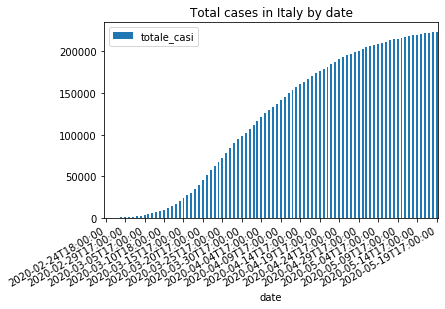

In [24]:
# plotting a graph showing day by day the number of total cases in Italy
ax = total_cases_by_date.plot(lw=2, title="Total cases in Italy by date", kind="bar")

ax.set_xlabel("date")

# sampling the dates on the ticks labels (printing a date label every 5 days)
# TODO magari formattare le date in modo che appaiano più leggibili, magari taglianod i minuti e secondi e lasciando 
# solo giorno mese anno
xticks = ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 5 != 0:
        xticks[i].set_visible(False)
        
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()


In [19]:
# showing the average number of cases(in each province) day by day (da vedere se tenere oppure no, il grafico viene
#  della stessa forma di questo sopra)
average_number_cases_by_date = refined_province_data_by_data_and_province.groupby(['data']).mean()
average_number_cases_by_date.head()

,totale_casi
data,
2020-02-24T18:00:00,0.000000
2020-02-25T18:00:00,2.915888
2020-02-26T18:00:00,3.457944
2020-02-27T18:00:00,5.841121
2020-02-28T18:00:00,7.719626


In [ ]:
# group by "sigla_provincia" and sum all the values. Showing the top 15 provinces with the highest value on 
# 'totale_casi'
refined_province_data.groupby(['sigla_provincia']).sum().nlargest(15, 'totale_casi').plot(kind="bar")
plt.title("Top 20 provinces with most cases") 

Text(0.5, 1.0, 'Top 20 provinces with most cases')

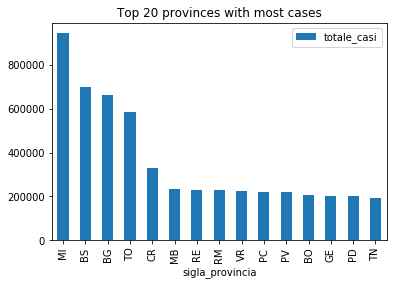